# Generate Gaussians and look at 'em


In [1]:
%matplotlib inline
import sys, math
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rng

In [2]:
def plot_2D_Gaussian_surface(Mu, invC):
    numsteps = 300
    x, y =np.linspace(-10,10,numsteps), np.linspace(-10,10,numsteps)
    X = np.zeros(shape=[2,numsteps,numsteps])
    X[0], X[1] = np.meshgrid(x, y, sparse=False, indexing='ij')
    invCX = np.tensordot(invC, X, axes=1)
    z = np.sum(X * invCX,0)
    z = np.exp(-0.5 * z)
    plt.contourf(x,y,z, cmap='jet')
    plt.axis('equal')

In [3]:
def random_rotation(C, angle):
    invC = np.linalg.inv(C)
    R = np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]]) # rotation matrix
    invC = np.dot(np.linalg.inv(R), np.dot(invC, R))
    C = np.linalg.inv(invC)
    return invC, C

Covariance matrix: 
 [[ 5.   4.5]
 [ 4.5  5. ]]
Covariance matrix: 
 [[ 1.99121844 -0.12869203]
 [-0.12869203  0.11404472]]


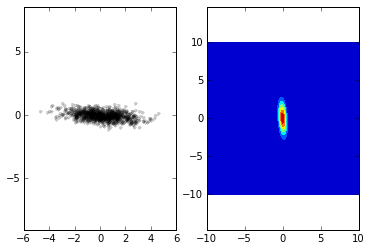

In [5]:
C = np.array([[5,4.5], [4.5,5]])
Mu = np.array([0.0,0.0])
print ('Covariance matrix: \n %s' % str(C))
angle = rng.random() * math.pi
C, invC = random_rotation(C, angle)
print ('Covariance matrix: \n %s' % str(C))

x = rng.multivariate_normal(Mu, C, 1000)
plt.subplot(121)  # Just draw shitloads of samples
plt.plot(x[:,0], x[:,1],'.k',alpha=.2)
plt.axis('equal')

plt.subplot(122)  # plot the analytic surface
plot_2D_Gaussian_surface(Mu, invC)